# Sabemetrics Project
#### By: Rafael Perez
### Description of Data

playerID&emsp;Player ID code
<br>
yearID&emsp;&nbsp;&nbsp;&nbsp;Year
<br>
stint     &emsp;    &nbsp;&nbsp;&nbsp;  &nbsp;player's stint (order of appearances within a season)
<br>
teamID     &emsp;  Team
<br>
lgID     &emsp; &nbsp;&nbsp; &nbsp;&nbsp;    League
<br>
G      &emsp; &nbsp; &nbsp;&nbsp;&nbsp;    &nbsp;&nbsp;  Games
<br>
AB       &emsp;  &nbsp;&nbsp; &nbsp; &nbsp; At Bats
<br>
R    &emsp; &nbsp; &nbsp;&nbsp;&nbsp;    &nbsp;&nbsp;         Runs
<br>
H   &emsp; &nbsp; &nbsp;&nbsp;&nbsp;    &nbsp;&nbsp;     Hits
<br>
2B     &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;      Doubles
<br>
3B     &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;       Triples
<br>
HR     &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;       Homeruns
<br>
RBI      &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;       Runs Batted In
<br>
SB     &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;         Stolen Bases
<br>
CS    &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;        Caught Stealing
<br>
BB    &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;          Base on Balls
<br>
SO    &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;        Strikeouts
<br>
IBB      &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;       Intentional walks
<br>
HBP     &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;      Hit by pitch
<br>
SH   &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;       Sacrifice hits
<br>
SF    &emsp;  &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;       Sacrifice flies
<br>
GIDP   &emsp;  &nbsp;&nbsp;      Grounded into double plays


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [61]:
mlb_df = pd.read_csv('batting.csv')

In [62]:
mlb_df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105105.000000,103493.000000,82320.000000,105861.000000,103761.000000,69210.000000,103044.000000,99792.000000,69757.000000,80420.0000
mean,1965.775290,1.078773,51.214338,140.960694,18.694212,36.861583,6.266321,1.271875,2.843209,16.968432,2.970771,1.205576,12.990431,20.577057,1.086086,1.060809,2.252535,1.043594,2.9404
std,39.319486,0.286613,47.057599,184.433173,28.180404,52.471260,9.666868,2.621256,6.354058,26.342342,7.687529,2.717156,20.706939,28.345666,2.750420,2.290011,4.198339,1.950372,4.7085
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,1935.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,1975.000000,1.000000,34.000000,48.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,2000.000000,1.000000,80.000000,229.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.0000
max,2018.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.0000


In [63]:
mlb_2018 = mlb_df['yearID'] == 2018

In [64]:
new_mlb = mlb_df[mlb_2018]
new_mlb

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
104326,abreujo02,2018,1,CHA,AL,128,499,68,132,36,1,22,78.0,2.0,0.0,37,109.0,7.0,11.0,0.0,6.0,14.0
104327,acunaro01,2018,1,ATL,NL,111,433,78,127,26,4,26,64.0,16.0,5.0,45,123.0,2.0,6.0,0.0,3.0,4.0
104328,adamewi01,2018,1,TBA,AL,85,288,43,80,7,0,10,34.0,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0
104329,adamja01,2018,1,KCA,AL,31,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104330,adamsau02,2018,1,WAS,NL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104331,adamsch01,2018,1,NYA,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104332,adamsla01,2018,1,ATL,NL,26,25,10,6,1,0,2,6.0,1.0,0.0,4,8.0,0.0,0.0,0.0,0.0,1.0
104333,adamsma01,2018,1,WAS,NL,94,249,37,64,9,0,18,48.0,0.0,0.0,24,55.0,2.0,4.0,0.0,0.0,6.0
104334,adamsma01,2018,2,SLN,NL,27,57,5,9,1,0,3,9.0,0.0,0.0,3,18.0,1.0,0.0,0.0,0.0,0.0
104335,adducji02,2018,1,DET,AL,59,176,19,47,8,2,3,21.0,1.0,0.0,6,45.0,0.0,0.0,2.0,1.0,2.0


In [65]:
new_mlb.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,1535.0,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,2018.0,1.110749,46.638436,107.773290,14.091205,26.723127,5.384365,0.551792,3.638436,13.424104,1.611726,0.624104,10.218893,26.844951,0.605212,1.252117,0.536156,0.804560,2.252117
std,0.0,0.349308,44.334778,171.876701,24.775646,45.537392,9.658620,1.390889,7.358147,23.990721,4.543330,1.607534,18.961026,41.436235,1.874268,2.769435,1.372989,1.671014,4.120530
min,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.0,1.000000,31.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.0,1.000000,67.500000,144.500000,17.000000,35.000000,6.000000,0.000000,3.000000,16.000000,1.000000,0.000000,12.000000,39.000000,0.000000,1.000000,0.000000,1.000000,3.000000
max,2018.0,5.000000,162.000000,664.000000,129.000000,192.000000,51.000000,12.000000,48.000000,130.000000,45.000000,14.000000,130.000000,217.000000,25.000000,22.000000,12.000000,11.000000,23.000000


Text(0, 0.5, 'Players')

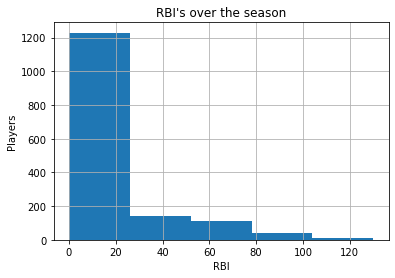

In [66]:
new_mlb['RBI'].hist(bins = 5)
plt.title("RBI's over the season")
plt.xlabel("RBI")
plt.ylabel("Players")

In [67]:
new_mlb['RBI'].min()


0.0

In [68]:
max_rbi = new_mlb['RBI'].max()
new_mlb[new_mlb['RBI'] == max_rbi]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
105175,martijd02,2018,1,BOS,AL,150,569,111,188,37,2,43,130.0,6.0,1.0,69,146.0,11.0,4.0,0.0,7.0,19.0


In [69]:
max_hr = new_mlb['HR'].max()
new_mlb[new_mlb['HR'] == max_hr]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
104645,daviskh01,2018,1,OAK,AL,151,576,98,142,28,1,48,123.0,0.0,0.0,59,175.0,5.0,12.0,0.0,7.0,16.0


In [70]:
los_angeles_filter = new_mlb['teamID'] == 'LAA'

In [71]:
new_mlb[los_angeles_filter]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
104351,almonmi01,2018,1,LAA,AL,8,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104358,alvarjo02,2018,1,LAA,AL,76,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104365,anderju01,2018,1,LAA,AL,57,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104380,arciafr01,2018,1,LAA,AL,41,103,10,21,5,0,6,23.0,1.0,0.0,1,27.0,0.0,2.0,0.0,0.0,4.0
104405,bardlu01,2018,1,LAA,AL,8,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104418,barrija01,2018,1,LAA,AL,26,5,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0
104435,bedroca01,2018,1,LAA,AL,71,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
104465,blashja01,2018,1,LAA,AL,24,39,4,4,1,0,0,1.0,2.0,1.0,5,24.0,0.0,0.0,0.0,1.0,0.0
104496,bricejo01,2018,1,LAA,AL,46,117,12,28,2,0,5,10.0,0.0,1.0,8,35.0,0.0,2.0,1.0,0.0,2.0
104497,bridwpa01,2018,1,LAA,AL,5,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
mike_trout_filter = new_mlb['playerID'] == 'troutmi01'

In [73]:
new_mlb[mike_trout_filter]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
105723,troutmi01,2018,1,LAA,AL,140,471,101,147,24,4,39,79.0,24.0,2.0,122,124.0,25.0,10.0,0.0,4.0,5.0


Text(0, 0.5, 'Players')

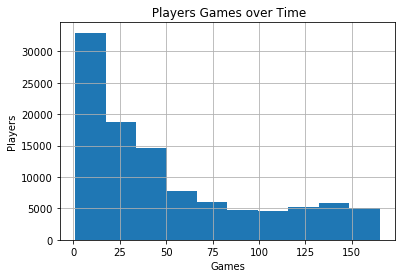

In [74]:
mlb_df['G'].hist()
plt.title(" Players Games over Time")
plt.xlabel("Games")
plt.ylabel('Players')

Text(0, 0.5, '# of Players')

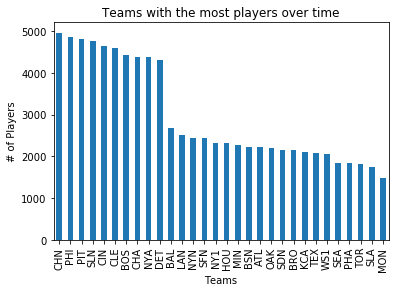

In [80]:
teams = mlb_df["teamID"].value_counts()
teams.head(30).plot.bar()
plt.title("Teams with the most players over time")
plt.xlabel("Teams")
plt.ylabel("# of Players")

Text(0, 0.5, 'Players')

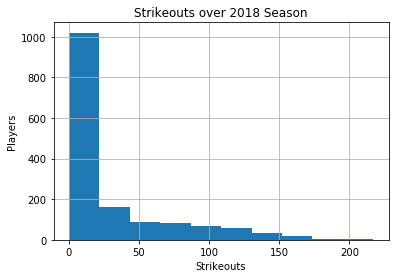

In [81]:
new_mlb['SO'].hist()
plt.title('Strikeouts over 2018 Season')
plt.xlabel('Strikeouts')
plt.ylabel('Players')

Text(0, 0.5, 'Players')

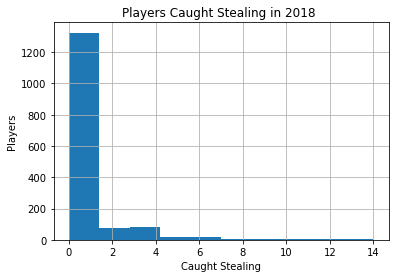

In [85]:
new_mlb['CS'].hist()
plt.title('Players Caught Stealing in 2018 ')
plt.xlabel('Caught Stealing')
plt.ylabel('Players')

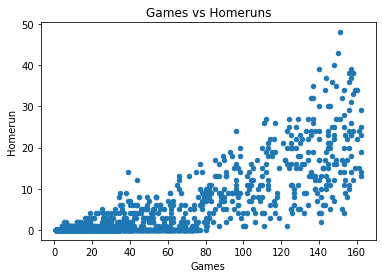

In [17]:
new_mlb.plot.scatter(x = "G", y = "HR")
plt.title('Games vs Homeruns')
plt.xlabel('Games')
plt.ylabel('Homerun')
plt.show()

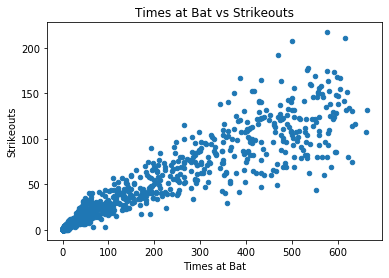

In [18]:
new_mlb.plot.scatter(x = "AB", y = "SO")
plt.title('Times at Bat vs Strikeouts')
plt.xlabel('Times at Bat')
plt.ylabel('Strikeouts')
plt.show()

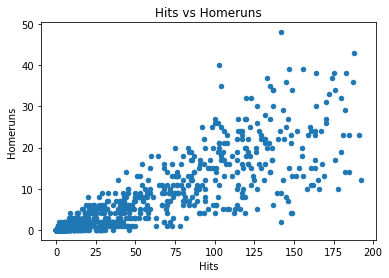

In [19]:
new_mlb.plot.scatter(x = "H", y = "HR")
plt.title('Hits vs Homeruns')
plt.xlabel('Hits')
plt.ylabel('Homeruns')
plt.show()


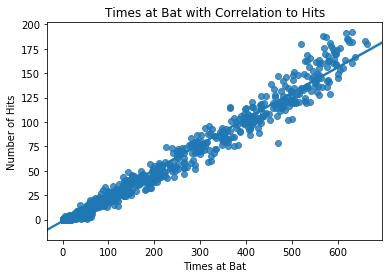

In [92]:
#For Linear Regression
sns.regplot(x = 'AB', y = 'H', data = new_mlb)
plt.title('Times at Bat with Correlation to Hits')
plt.xlabel('Times at Bat')
plt.ylabel('Number of Hits')
plt.show()


In [91]:
lm = smf.ols('H ~ AB', new_mlb).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 8.045e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:44:35   Log-Likelihood:                -4984.9
No. Observations:                1535   AIC:                             9974.
Df Residuals:                    1533   BIC:                             9984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5623      0.188     -8.325      0.000      -1.930      -1.194
AB             0.2625      0.001    283.639      0.000       0.261       0.264
==============================================================================
Omnibus:                      328.354   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5506.883
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                      12.221   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""